### Estatística descritiva
  
Gráficos:  
  - Frequência
  - Distribuições


In [1]:
import os, sys, math
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

import matplotlib.pyplot as plt # matplotlib e seu alias plt
import matplotlib as mpl
%matplotlib inline

### Vamos começar com perguntas filosóficas
## Qual a diferença entre simulação e experimento?
## O que é um modelo?
## Porque a ciência se baseia em modelos?
## O que é a navalha de Ocham? https://en.wikipedia.org/wiki/Occam%27s_razor

pesquisem à vontade
#### Por não podermos acessar "todos os dados" coletamos amostras e inferimos valores médios (via modelos), sempre com erros. Caso os valores médios calculados (esperanças) se aproximem dos observados (hipotética realidade, vide Kant), diz-se que o modelo é bom ou aceitável (https://iep.utm.edu/models/)
#### Por vezes não acessamos os dados, ou não os entedemos, nestes casos só nos resta a simulação. Num momento seguinte, de posse dos dados, analisamos se a  simulação se aproxima dos valores observados. A esta comparação se denomina 'data fitting'. Caso obtenhamos a melhor distribuição, temos um modelo para os dados, logo podemos inferir seus parâmetros e possível comportamento (físico, químico, etc.)
#### Nunca temos certeza de nada, logo não há verdade absoluta (resultados exatos não existem). Por consequência um resultado científico (média ou valor esperado) tem que vir seguido de seu respectivo erro (desvio padrão ou dispersão ou incerteza, e sempre que possível do intervalo de confiança)
#### Nunca oculte nada em ciência! Ciência tem que ser reprodutível, logo, nunca omita a quantidade de amostras coletadas (n), o momento em que foi coletada (data/hora), equipamento, dados complementares (pessoas, local, temperatura, humidade, etc) e métodos.
#### Caso se manipule dados, não adianta fazer estatística. Numa máquina de inferência ao se colocar dados ruins se extrai automaticamente dados ruins (ninguém conseguirá reproduzir seu experimento).
#### Por vezes, sabe-se previamente como os dados se comportam, logo a estatística clássica se torna inficiente. Neste caso utilizamos da "estatística bayesiana" onde se conhece uma distribuição a priori (conhecimento prévio), e dada a distribuição do fenômeno analisado (experimento) e se infere uma distribuição final (a posteriori). Ou seja, a distribuição a posteriori contempla o valor médio (esperança) e o desvio padrão (erro ou dispersão) simulado ou calculado. A estatística bayesina não faz parte deste curso, mas creio, que ao final podemos apresentar um exemplo.


### O que é frequência?
### Frequência é a contagem de eventos dado um experimento
### Exemplo: se jogar um dado 100 vezes qual a frequência de cada número?

In [8]:
# dê vários ctrl+enter
dado = np.random.randint(1, 7)
dado

3

### Vamos jogar 10 vezes este dados

In [9]:
N = 10
dados = np.random.randint(1, 7, size=N)
dados, np.mean(dados)

(array([2, 6, 4, 1, 2, 4, 1, 6, 6, 5]), 3.7)

### Vamos jogar 100 vezes este dados. Qual a diferença?

In [16]:
N = 100
dados = np.random.randint(1, 7, size=N)
dados[:10], np.mean(dados)

(array([5, 2, 1, 3, 2, 6, 4, 4, 3, 3]), 3.5)

### Qual a frequência?

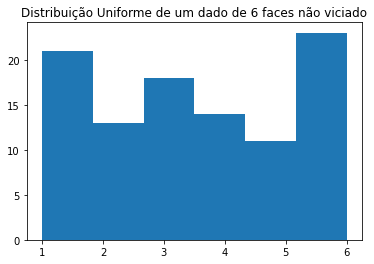

In [17]:
plt.hist(dados, bins=6)
plt.title("Distribuição Uniforme de um dado de 6 faces não viciado");
plt.xticks([1,2,3,4,5,6]);

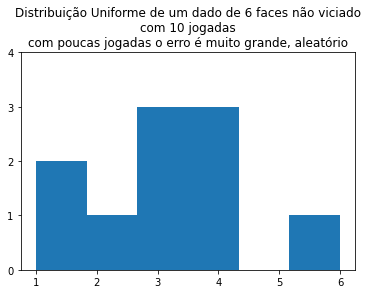

In [27]:
N = 10
dados = np.random.randint(1, 7, size=N)
dados[:10], np.mean(dados)

plt.hist(dados, bins=6)
stri = "\ncom poucas jogadas o erro é muito grande, aleatório"
plt.title("Distribuição Uniforme de um dado de 6 faces não viciado\ncom %d jogadas%s"%(N, stri));
plt.xticks([1,2,3,4,5,6])
plt.yticks([0, 1, 2, 3, 4]);

### Aumentando-se o número de jogadas
### Aproxima-se de uma gráfico de frequências UNIFORME?

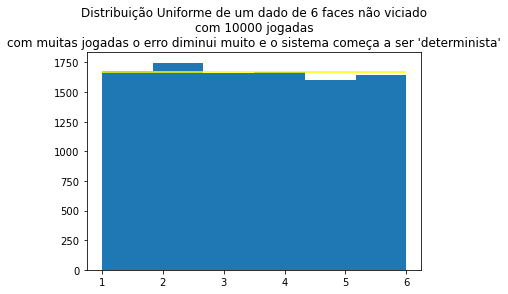

In [30]:
N = 10000
dados = np.random.randint(1, 7, size=N)
dados[:10], np.mean(dados)

plt.hist(dados, bins=6)
stri = "\ncom muitas jogadas o erro diminui muito e o sistema começa a ser 'determinista'"
plt.title("Distribuição Uniforme de um dado de 6 faces não viciado\ncom %d jogadas%s"%(N, stri))
plt.hlines(N/6, 1,6, color='yellow') 
plt.xticks([1,2,3,4,5,6]);

### Vamos melhorar o tamanho da figura
### Repare que plt.hist retorna dados

(array([179., 156., 180., 162., 170., 153.]),
 array([1.        , 1.83333333, 2.66666667, 3.5       , 4.33333333,
        5.16666667, 6.        ]),
 <BarContainer object of 6 artists>)

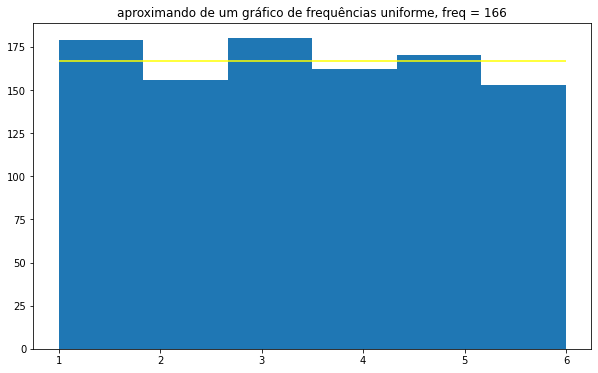

In [55]:
N = 1000
dados = np.random.randint(1, 7, size=N)
dados[:10], np.mean(dados)

fig = plt.figure(figsize=(10,6)) 
ret = plt.hist(dados, bins=6)
plt.hlines(N/6, 1,6, color='yellow')
plt.title("aproximando de um gráfico de frequências uniforme, freq = %d"%(int(N/6)))
ret

In [56]:
### contagens - frequências
ret[0]

array([179., 156., 180., 162., 170., 153.])

In [57]:
counts = [int(x) for x in ret[0]]
counts, np.mean(counts), np.std(counts)

([179, 156, 180, 162, 170, 153], 166.66666666666666, 10.514540197058336)

In [58]:
### eixo x -> bins -> intervalos
ret[1]

array([1.        , 1.83333333, 2.66666667, 3.5       , 4.33333333,
       5.16666667, 6.        ])

In [59]:
# numpy
#   np.ceil() -- teto
#   np.floor() -- chão
#   np.round(,ncasas) -- arredondamento

posx = [int(np.ceil(x)) for x in ret[1][0:-1]]
posx

[1, 2, 3, 4, 5, 6]

### Parâmetros desta distribuição

  - np.isclose: Returns a boolean array where two arrays are element-wise equal within a tolerance. The tolerance values are positive, typically very small numbers.
  
  - média das freqûencias lidas, uma vez que é uma distribuição uniforme


(36.30733014450694, 1666.6666666666667, 1666.6666666666667, True)

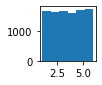

In [88]:
N = 10000
dados = np.random.randint(1, 7, size=N)

fig = plt.figure(figsize=(1,1)) 
ret = plt.hist(dados, bins=6)

mu  = np.mean(ret[0])
ssd = np.std(ret[0])

ssd, mu, N/6, np.isclose(mu, N/6)

In [83]:
?plt.hist

  - desvio padrão amostral: ssd = sample standard distribution

In [89]:
ssd = np.std(ret[0])
np.round(ssd,2)

36.31

  - coeficiente de variação = ssd / mu

In [90]:
vc = ssd/mu

"variational coefficient is equal to %.2f%%"%(vc*100)

'variational coefficient is equal to 2.18%'

### Fazer o gráfico de SSD x N
### De acordo com que N (numero amostral) aumente --> SSD dimimui --> fico com a certeza do valor da media

### O que é uma distribuição?

Distribuição é uma função matemática cuja integral (soma de todos os valores) é igual a 1 (hum) ou 100% (cem porcento). Ela representa (estima) todas as possíveis probabilidades que um dado evento (ou valor) possa ser selecionado (sorteado).

Um gráfico de frequência normalizado é uma distribuição.  

<font size="5">$\sum_{i=1}^{1000}{p_i} = 1$</font>

Markdown para soma:

$\sum_{i=1}^{1000}{p_i}$



\sum_{inicio}^{fim}{variável}

### Vamos normalizar o gráfico de frequências para se tornar uma distriução

In [91]:
vals = ret[0]
len(vals), vals

(6, array([1672., 1642., 1657., 1613., 1687., 1729.]))

### Para se obter uma distribuição tem que ser normalizar os valores das frquências

In [92]:
# Normalizando
vals = [x / N for x in vals]
vals

[0.1672, 0.1642, 0.1657, 0.1613, 0.1687, 0.1729]

In [93]:
np.sum(vals)

1.0

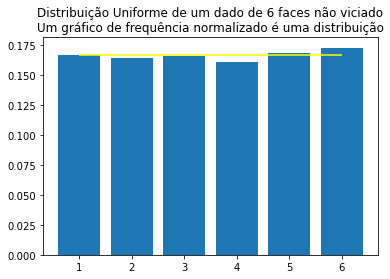

In [95]:
plt.bar(np.arange(1,7), vals)
plt.hlines(1/6, 1, 6, color='yellow')
plt.title("Distribuição Uniforme de um dado de 6 faces não viciado\nUm gráfico de frequência normalizado é uma distribuição");

A distribuição mais simples é a de uma moeda sendo jogada para o ar e analisado seu resultado quando parar de se movimentar ao chegar ao solo. Se a moeda é não viciada, a probabilidade de dar cara é igual à probabilidade de dar corroa = 0.5 = 50%. 

<font size="5">p(Cara) = p(Coroa) = .5; se e somente se a moeda for não viciada</font>

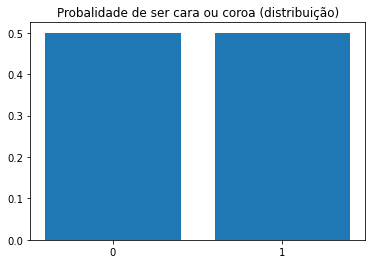

In [96]:
pCara = 0.5
pCoroa = 0.5

x = [pCara, pCoroa]

plt.bar([0,1], [pCara, pCoroa])
plt.xticks([0,1])
plt.title("Probalidade de ser cara ou coroa (distribuição)");

### Desenhe uma distribuição de uma moeda viciada

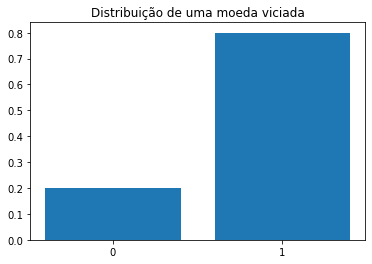

In [106]:
pCara = 0.2
pCoroa = 0.8

if pCara+pCoroa == 1:
    x = [pCara, pCoroa]

    plt.bar([0,1], [pCara, pCoroa])
    plt.xticks([0, 1])
    plt.title("Distribuição de uma moeda viciada");
else:
    print("Erro nas probabilidades")
    print(np.round(pCara+pCoroa, 8))

### Jogue uma moeda 10000 vezes e obtenha sua distribuição

In [118]:
np.random.randint(0, 2, size=5)

array([0, 0, 1, 0, 0])

(array([501.,   0., 499.]),
 array([0.        , 0.33333333, 0.66666667, 1.        ]),
 <BarContainer object of 3 artists>)

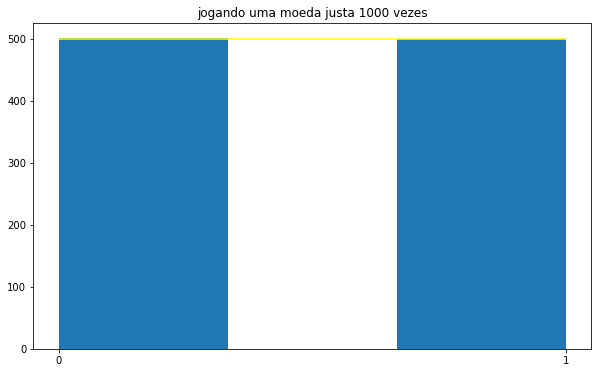

In [144]:
N = 1000
eventos = 2

dados = np.random.randint(0, eventos, size=N)
fig = plt.figure(figsize=(10,6)) 
ret = plt.hist(dados, bins=eventos+1)
plt.hlines(N/eventos, 0, eventos-1, color='yellow')
plt.title("jogando uma moeda justa %d vezes"%(N) )
plt.xticks([0,1])
ret

In [146]:
0.5-np.std(dados)

1.000001000006634e-06

### Qual a diferença entre uma distribuição contínua e uma discreta?

  - uma distribuição discreta: os possíveis eventos são discretos como 0,1,2,3 ... / casa, carro, loja ...
    - p.ex.: distribuição binomial: só tem dois eventos discretos (distintos)
  - uma distribuição contínua: os possíveis eventos são contínuos como o intervalo entre [0, 5] - infinitos números .... 0, 0.0001, 0.0002 .... 4.9999, 5
    - p.ex.: distribuição normal (gaussiana)

### Distribuição binomial
### Caso mais simples: a moeda
  - vamos jogar uma só vez
  - há duas possibiliades: cara ou coroa (n = 2)
  - não viciado então p = .5

In [158]:
n = 1    # uma moeda - n = numero de jogadas simultâneas
p = 0.5  # dado não viciado p(cara) = p(coroa) = .5
N = 1    # vamos jogar somente uma vez


# dê CTRL-enter várias vezes
# maquina rândomica do "numpy"
jogo = np.random.binomial(n, p, N)
list(jogo)

[0]

### Vamos jogar 100 vezes a moeda

In [176]:
n = 1    # uma moeda - n = numero de jogadas simultâneas
p = 0.5  # dado não viciado p(cara) = p(coroa) = .5
N = 10000   # vamos jogar 10 vezes

jogo = np.random.binomial(n, p, N)
jogo[:15], len(jogo)

(array([1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1]), 10000)

### Assim como num dado, simulação acima, podemos estimar o valor esperado (média) ao jogarmos muitas moedas

In [177]:
mu  = np.round(np.mean(jogo), 2)
ssd = np.round(np.std(jogo), 2)
# coeficiente de variação
vc = np.round(ssd/mu, 2)

#-- media = valor esperado
#-- moeda justa: 50% cara, 50% coroa
mu, ssd, vc

(0.5, 0.5, 1.0)

### O que se conclui? 
### O que acontece com o desvio padrão de acordo com que o n aumenta? Faça um gráfico de SSD x n


### Vamos jogar 100 vezes 3 moedas simultaneamente

C C C  
C C K  
...  
K K K 

### Frequência:
  - n caras
  - n coroas
  
### Exemplo:
   - 2 caras e 1 coroa
   - jogando 3 moedas
     - CCK, CKC, KCC (3 formas)
     
   - 3 caras e 0 coroa
     - CCC

In [219]:
n  = 3    # quantas vezes posso acertar (total de moedas - acertar CCC, errar KKK)
p  = 0.5  # dado não viciado p(cara) = p(coroa) = .5
N  = 5    # quantas vezes


jogo = np.random.binomial(n, p, N)
print("qtas x acertei jogo 1            ... qtas vezes acertei no jogo 2")
print("qtas x acertei jogo 1 = %d caras ... qtas vezes acertei no jogo 2 = %d caras"%(jogo[0], jogo[1]))
jogo

qtas x acertei jogo 1            ... qtas vezes acertei no jogo 2
qtas x acertei jogo 1 = 0 caras ... qtas vezes acertei no jogo 2 = 2 caras


array([0, 2, 3, 2, 1])

### Como fica o histograma de frequências? O que significa?
### Porque vai somente até 3?
### Porque o valor de 1 e 2 têm frequência mais alta?

não vamos encontrar mais uma distribuição uniforme   
e sim uma distribuição mono-modal

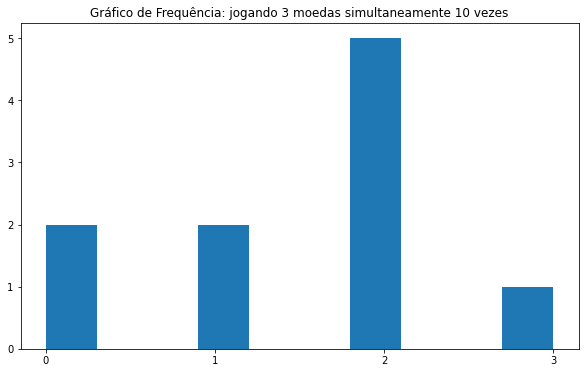

In [247]:
n  = 3    # quantas vezes posso acertar (total de moedas - acertar CCC, errar KKK)
p  = 0.5  # dado não viciado p(cara) = p(coroa) = .5
N  = 10    # quantas vezes

jogo = np.random.binomial(n, p, N)

fig = plt.figure(figsize=(10,6))
ret = plt.hist(jogo)
plt.title("Gráfico de Frequência: jogando 3 moedas simultaneamente %d vezes"%(N));
plt.xticks([0, 1, 2, 3]);

In [225]:
jogo

array([1, 3, 3, 3, 3])

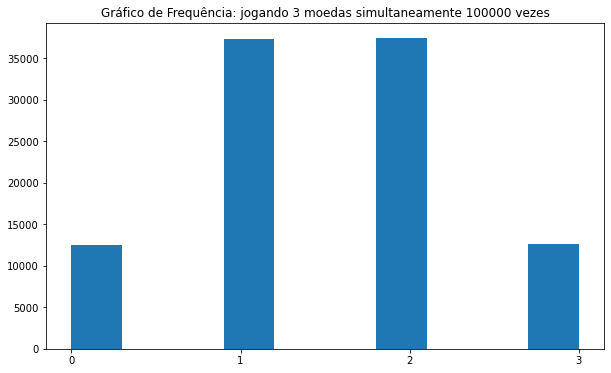

In [254]:
n  = 3    # quantas vezes posso acertar (total de moedas - acertar CCC, errar KKK)
p  = 0.5  # dado não viciado p(cara) = p(coroa) = .5

N = 100000
jogo = np.random.binomial(n, p, N)

fig = plt.figure(figsize=(10,6))
ret = plt.hist(jogo)
plt.title("Gráfico de Frequência: jogando 3 moedas simultaneamente %d vezes"%(N));
plt.xticks([0, 1,2,3]);

### 3 moedas- uma distribuição

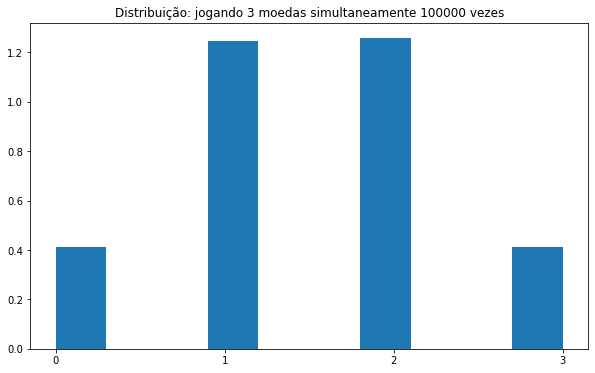

In [244]:
fig = plt.figure(figsize=(10,6))
ret = plt.hist(jogo, density=True)
plt.title("Distribuição: jogando 3 moedas simultaneamente %d vezes"%(N));
plt.xticks([0,1,2,3]);

In [245]:
ret[0]

array([0.4141    , 0.        , 0.        , 1.2482    , 0.        ,
       0.        , 1.25793333, 0.        , 0.        , 0.4131    ])

In [246]:
ret[1]

array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ])

### Jogando 4 moedas!

#### É mais fácil acertar 2 caras + 2 coroas ou 4 caras?
#### É mais fácil acertar 4 coroas ou 4 caras?
  - é igual se moedas justas (gráfico é simétrico)
  - é diferente se moedas viciadas (gráfico se torna assimétrico)


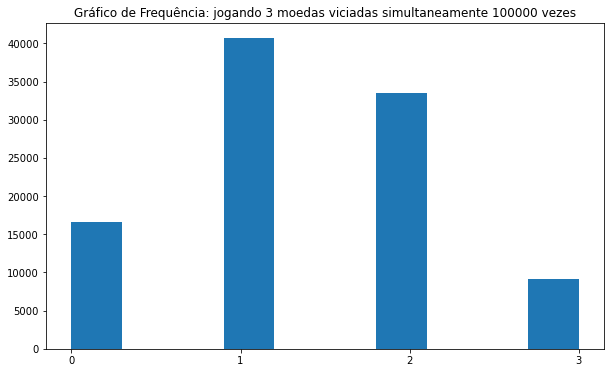

In [256]:
n  = 3     # quantas vezes posso acertar (total de moedas - acertar CCC, errar KKK)
p  = 0.45  # dado viciado p(cara) < p(coroa)
# espero uma tendência da barra subir para esquerda (errar mais)
#                       a barra da esquerda deve ficar maior

N = 100000
jogo = np.random.binomial(n, p, N)

fig = plt.figure(figsize=(10,6))
ret = plt.hist(jogo)
plt.title("Gráfico de Frequência: jogando 3 moedas viciadas simultaneamente %d vezes"%(N));
plt.xticks([0, 1,2,3]);

veja: https://seaborn.pydata.org/generated/seaborn.distplot.html

### Gere um histograma da distribuição do jogo de moedas

In [257]:
np.arange(0,4)

array([0, 1, 2, 3])

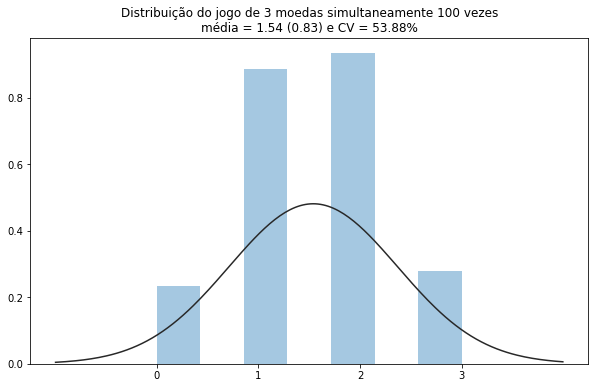

In [262]:
from scipy.stats import norm
n = 3    # quatro moedas - n = numero de jogadas simultâneas
p = 0.5  # dado não viciado p(cara) = p(coroa) = .5
N = 100
jogo = np.random.binomial(n, p, N)

muj  = np.mean(jogo)
ssdj = np.std(jogo)
vc = ssdj/muj

fig = plt.figure(figsize=(10,6))
ax = sns.distplot(jogo, hist=True, kde=False, fit=norm)
ax.set_title("Distribuição do jogo de %d moedas simultaneamente %d vezes\nmédia = %.2f (%.2f) e CV = %.2f%%"%(n, N, muj, ssdj, vc*100));

ax.set_xticks(np.arange(0,n+1));

### O que acontece se forem 50 moedas? (... ou 50 genes)
### A distribuição discreta se aproxima da contínua?
### Esta foi a solução do grande paradoxo da Biologia até 1930 !!! solucionado por Ronald Fisher

<h3>Que parodoxo é este?</h3>
    
<h3><span style="color:red">Paradox: the phenotipic distribution must obey a discrete (mutational theory) or continuous (Darwin theory) distribution?</span></h3>
<h3><span style="color:blue">solved by Ronald Fischer in 'The Genetical Theory of Natural Selection' </span></h3>

The Genetical Theory of Natural Selection is a book by Ronald Fisher which combines Mendelian genetics with Charles Darwin's theory of natural selection, with Fisher being the first to argue that "Mendelism therefore validates Darwinism" and stating with regard to mutations that "The vast majority of large mutations are deleterious; small mutations are both far more frequent and more likely to be useful", thus refuting orthogenesis. First published in 1930 by The Clarendon Press, it is one of the most important books of the modern synthesis, and helped define population genetics. It is commonly cited in biology books, outlining many concepts that are still considered important such as Fisherian runaway, Fisher's principle, reproductive value, Fisher's fundamental theorem of natural selection, Fisher's geometric model, the sexy son hypothesis, mimicry and the evolution of dominance. It was dictated to his wife in the evenings as he worked at Rothamsted Research in the day. (https://en.wikipedia.org/wiki/The_Genetical_Theory_of_Natural_Selection )

veja também:

Modern Syntesis: (https://en.wikipedia.org/wiki/Modern_synthesis_(20th_century))  
  
Random Mutations and Evolutionary Changes: https://evolution.berkeley.edu/evolibrary/article/0_0_0/history_19  


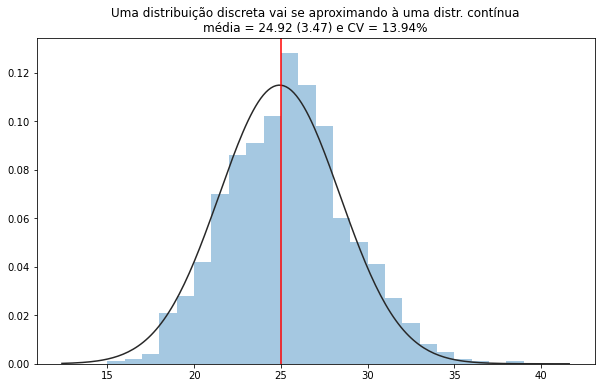

In [263]:
from scipy.stats import norm

n = 50   # genes / alelos
p = 0.5  # dado não viciado p(cara) = p(coroa) = .5
N = 1000
jogo = np.random.binomial(n, p, N)

muj  = np.mean(jogo)
ssdj = np.std(jogo)
vc = ssdj/muj

fig = plt.figure(figsize=(10,6))
ax = sns.distplot(jogo, hist=True, kde=False, fit=norm)
ax.axvline(n/2, color='red')
ax.set_title("Uma distribuição discreta vai se aproximando à uma distr. contínua\nmédia = %.2f (%.2f) e CV = %.2f%%"%(muj, ssdj, vc*100));
# ax.set_xticks([0,1,2,3,4]);

### De acordo com que mais moedas (genes) são jogadas, a média aumenta assim como o desvio padrão (mas o CV parece diminuir)

### Para estudar em casa ...


<h3><span style="color:red">O que é a catraca de Muller?</span></h3>

Muller's ratchet: 
  - https://en.wikipedia.org/wiki/Muller%27s_ratchet


### A distribuição normal é uma distribuição contínua e paramétrica
  - contínua: domínio dos números Reais [-infinito a +infinto]
  - paramétrica: só depende da MEDIA e do DESVIO PADRÃO

### Distribuição normal

[distribuição normal - wiki](https://en.wikipedia.org/wiki/Normal_distribution)  

[distribuição normal - Portal Action](http://www.portalaction.com.br/probabilidades/62-distribuicao-normal)  

[distribuição normal - Khan academi](https://www.khanacademy.org/math/statistics-probability/modeling-distributions-of-data/normal-distributions-library/v/ck12-org-normal-distribution-problems-qualitative-sense-of-normal-distributions)  


### Gerando distribuições normais (Gaussianas)

In [264]:
mu = 20
sd = 2
N = 1000

x = np.random.normal(mu, sd, N)
x[:10]

array([22.51741079, 18.54422567, 18.07162161, 15.48347431, 21.11070646,
       20.36041799, 21.19926298, 18.29140073, 18.72145232, 18.64916241])

### Os valores estimados estão próximos dos parâmetro impostos? O que isto significa?

In [265]:
np.mean(x), np.median(x), np.std(x)

(19.97685585630116, 20.058990938797564, 2.0363390525630565)

### Entenda a máquina randômica (estocástica) gerando estes valores
  - rode várias vezes a célula abaixo
  - os números variam?

In [267]:
N= 10000
x = np.random.normal(mu, sd, N)
print(mu, sd)
print(np.mean(x), np.std(x))
#--- porque False???
np.isclose(mu, np.mean(x)), np.isclose(mu, np.median(x)), np.isclose(sd, np.std(x))

20 2
20.010415430208447 2.0099221376965253


(False, False, False)

  - rode várias vezes a célula abaixo
  - os números variam? NÃO. Porque?

In [ ]:
np.random.seed(3)
x = np.random.normal(mu, sd, N)
print(mu, sd)
print(np.mean(x), np.std(x))
#--- porque False???
np.isclose(mu, np.mean(x)), np.isclose(mu, np.median(x)), np.isclose(sd, np.std(x))

### E agora? o que há de diferente? Sabe explicar?

In [270]:
np.random.seed(3); N = 100000; tolerance=3e-2
x = np.random.normal(mu, sd, N)
print(mu, sd)
print(np.mean(x), np.std(x))
#--- porque False???
np.isclose(mu, np.mean(x), atol=tolerance), np.isclose(mu, np.median(x), atol=tolerance), np.isclose(sd, np.std(x), atol=tolerance)

20 2
19.99539248864733 1.9934116976929368


(True, True, True)

### Quanto maior o N menor o erro ao estimar esperanças (médias)

In [ ]:
np.random.seed(3); N = 10000000; tolerance=3e-3
x = np.random.normal(mu, sd, N)
print(mu, sd)
print(np.mean(x), np.std(x))
#--- porque False???
np.isclose(mu, np.mean(x), atol=tolerance), np.isclose(mu, np.median(x), atol=tolerance), np.isclose(sd, np.std(x), atol=tolerance)

### Lembra do que é media?
  - media é o valor esperado
    
<font size="5">\<x> = E[x] = media de x = $\frac{\sum_{i=1}^n{x_i}}{n}$</font>

### O que acontece de jogar 100 vezes e tirar a media?

In [ ]:
n = 1    # uma moeda - n = numero de jogadas simultâneas
p = 0.5  # dado não viciado p(cara) = p(coroa) = .5
N = 100  # vamos jogar 100 vezes

jogo = np.random.binomial(n, p, N)
np.mean(jogo)

### O que acontece de jogar 1000 vezes e tirar a media?

In [ ]:
N = 1000
jogo = np.random.binomial(n, p, N)
np.mean(jogo)

### O que acontece de jogar 10.000 vezes e tirar a media?

In [ ]:
N = 10000
jogo = np.random.binomial(n, p, N)
np.mean(jogo)

## Distribuições contínuas

### A distribuição normal (gaussiana) é:
  - contínua
  - centrada em 20 (media)
  - tem uma dispersão (desvio padrão) = 2
    
### Agora procure:
  - quantas amostras são maiores que 20+4 (20+2\*SD)? > 24
  - quantas amostras são menores que 20-4 (20-2\*SD)? < 16
  
  
### Veja matplotlib x seaborn

https://www.drawingfromdata.com/setting-figure-size-using-seaborn-and-matplotlib

In [ ]:
N = 1000
x = np.random.normal(mu, sd, N)

print(mu, sd)
print(np.mean(x), np.std(x))

plt.figure(figsize=(8,6))
ax = sns.distplot(x)
ax.set_title("Uma distribuição normal media=%d e sd=%d com %d valores"%(mu, sd, N))
ax.axvline(mu, color='red')
ax.axvline(mu+2*sd, color='navy')
ax.axvline(mu-2*sd, color='navy')
ax.set_xticks(np.arange(10,31));

In [ ]:
maiores = x[ x > mu + 2*sd]
len(maiores), maiores

In [ ]:
p = len(maiores) / len(x)
"Encontramos %d valores maiores que %.2f, ou seja %.2f%%"%(len(maiores), mu + 2*sd, p*100)

In [ ]:
menores = x[ x < mu - 2*sd]
len(menores), menores

In [ ]:
p = len(menores) / len(x)
"Encontramos %d valores menores que %.2f, ou seja %.2f%%"%(len(menores), mu - 2*sd, p*100)

### Repare que:
  - há aproximadamente 2.5% de valores maiores que MU + 2*SD (acima de 2 desvios padrões)
  - há aproximadamente 2.5% de valores menores que MU - 2*SD (abaixo de 2 desvios padrões)
  - por esta razão, veremos mais adiante, estima-se com referência um p-value = 0.05 = 5% 
  - quando se estuda valores abaixo e acima de uma distribuição dis-se que a distribuição é bi-caudal
  - exemplos:
    - pessoas muito magras ou muito gordas: estudo bi-caudal
    - homens acima de 2 metros: estudo mono-caudal
    

### Uma distribuição normal
  - é simétrica com relação à média
  - sua média = mediana = moda (unimodal)
  - é a base da distribuição Z (média = 0, SD = 1)

In [ ]:
N = 100000
mu = 20; sd = 2
x = np.random.normal(mu, sd, N)

ret = plt.hist(x, bins=100);

# frequencia
counts = ret[0]
counts = [int(x) for x in counts]
posx   = ret[1]
len(posx), len(counts)

In [ ]:
posx = [np.round((posx[i]+posx[i+1])/2,1) for i in range(len(posx)-1)]
len(posx), len(counts)

In [ ]:
# comprehension: tuplica os valores de posx
vals = [ [posx[i]]*counts[i] for i in range(len(posx))]
vals[:3]

In [ ]:
from functools import reduce

# reduce: função agil que server para iterar sobre listas
# pega o primeiro valor da lista e soma com o segundo e assim por diante ...
vals = reduce((lambda x,y: x+y), vals)
vals[:10]

In [ ]:
from statistics import mode

mu = np.mean(x)
ssd = np.std(x)
med = np.median(x)
mod = mode(vals)

plt.figure(figsize=(8,6))
ax = sns.distplot(x, bins=20)
ax.set_title("Uma distribuição normal media=%d e sd=%d com %d valores"%(mu, sd, N))
ax.axvline(mu, color='red')
ax.axvline(mu+2*sd, color='navy')
ax.axvline(mu-2*sd, color='navy')
ax.axvline(med, color='navy')
ax.axvline(mod, color='yellow')
ax.set_xticks(np.arange(10,31));

In [ ]:
from statistics import mode

mea = np.mean(x)
ssd = np.std(x)
med = np.median(x)
mod = mode(vals)

plt.figure(figsize=(8,6))
ax = sns.distplot(x, bins=20)
ax.set_title("Uma distribuição normal media=%d e sd=%d com %d valores"%(mu, sd, N))
ax.axvline(mu, color='red')
ax.axvline(med, color='navy')
ax.axvline(mod, color='yellow')
ax.set_xticks(np.arange(10,31))

ax.set_xlim(mu-.2, mu+.2);

In [ ]:
mu, med, mod